## Executive Summary

### Overview
This analysis examines customer satisfaction with three Ethiopian mobile banking applications through sentiment analysis and thematic examination of 827 English reviews from the Google Play Store. The study identifies key satisfaction drivers, pain points, and provides actionable recommendations for each bank.

### Key Findings

#### Overall Sentiment Performance
- **Dashen Bank** leads with **69.7% positive reviews** and an average sentiment score of **0.370**
- **Commercial Bank of Ethiopia (CBE)** follows with **64.8% positive** and sentiment score of **0.260**
- **Bank of Abyssinia (BOA)** shows challenges with only **35.9% positive** and a slightly negative sentiment score of **-0.005**

#### Customer Satisfaction Drivers (Per Bank)

**Dashen Bank** - Market Leader
- Outstanding user experience (74.5% of positive reviews)
- Fast performance and reliability (25.9%)
- Consistently praised as "super app" and "best banking app"

**Commercial Bank of Ethiopia**
- Good user experience (59.2%)
- Appreciated features and functionality (25.2%)
- Positive mentions of digital services

**Bank of Abyssinia**
- User-friendly interface when working (61.5%)
- Basic features appreciated (15.4%)
- Limited positive feedback overall

#### Critical Pain Points (Per Bank)

**Bank of Abyssinia** - Urgent Attention Required
- 🔴 **Developer Options Bug**: Unique critical issue (10.2% of complaints)
- 🔴 **Technical Failures**: "Not working" issues (45.9%)
- 🔴 **Performance Problems**: Slow/laggy app (32.5%)

**Commercial Bank of Ethiopia**
- 🟡 **Platform Inequality**: Android missing features available on iOS (46.3%)
- 🟡 **Branch Verification**: Physical branch requirement blocks users (24.1%)
- 🟡 **Technical Issues**: Crashes and errors (37%)

**Dashen Bank**
- 🟢 **Server Reliability**: "Temporarily unavailable" errors (40.8%)
- 🟢 **Performance Degradation**: Slowness complaints (39.4%)
- 🟢 **Account Issues**: Opening/access problems (33.8%)

### Business Scenario Insights

#### Scenario 1: User Retention & Performance
- **BOA**: 45.9% of negative reviews mention performance - highest risk for user churn
- **Dashen**: 40.8% cite availability issues despite overall satisfaction
- **CBE**: 37% technical issues but better retention due to feature set

#### Scenario 2: Feature Requests & Competitive Gaps
Top Requested Features Across All Banks:
1. **Fingerprint/Biometric Authentication** - Most requested security feature
2. **International Transfers** - Critical for diaspora users
3. **Bill Payment Integration** - Convenience feature gap
4. **Budgeting Tools** - Modern banking expectation
5. **Enhanced Notifications** - Real-time updates needed

#### Scenario 3: Complaint Management Priorities
**Urgent Issues for Support Teams**:
- Login/Authentication problems (15-24% of complaints)
- App crashes and freezing (15-20%)
- Transaction failures (10-18%)
- Update-related bugs (14-24%)

### Strategic Recommendations

#### Bank of Abyssinia - Turnaround Strategy
**URGENT (0-1 month)**:
- 🔴 Emergency fix for developer options bug
- 🔴 Resolve "not working" technical failures
- 🔴 Performance optimization hotfix

**HIGH PRIORITY (1-3 months)**:
- 🟡 Comprehensive app stability overhaul
- 🟡 Enhanced update testing procedures
- 🟡 Improved error messaging

**QUICK WINS**:
- ⚡ Add fingerprint authentication
- ⚡ Improve notification system
- ⚡ Transaction history export

#### Commercial Bank of Ethiopia - Feature Parity Focus
**URGENT (0-1 month)**:
- 🔴 Enable Android feature parity with iOS
- 🔴 Implement remote verification alternative
- 🔴 Fix critical login/access issues

**HIGH PRIORITY (1-3 months)**:
- 🟡 Add "Pay to Beneficiary" for Android
- 🟡 Improve technical stability
- 🟡 Streamline update process

**QUICK WINS**:
- ⚡ Add dark mode
- ⚡ Quick balance check widget
- ⚡ Enhanced transaction notifications

#### Dashen Bank - Maintain Leadership
**URGENT (0-1 month)**:
- 🔴 Fix "temporarily unavailable" error
- 🔴 Enhance server reliability and capacity
- 🔴 Address performance degradation

**HIGH PRIORITY (1-3 months)**:
- 🟡 Streamline account opening process
- 🟡 Improve transaction success rate
- 🟡 Optimize app performance further

**QUICK WINS**:
- ⚡ Add offline balance viewing
- ⚡ Clearer error messages
- ⚡ Transaction receipt downloads

### Competitive Insights

**Market Position**:
1. **Dashen Bank**: Clear market leader with superior UX
2. **CBE**: Strong middle performer, needs feature parity
3. **BOA**: Significant challenges, requires urgent intervention

**Competitive Advantages**:
- **Dashen**: Best-in-class user experience and brand reputation
- **CBE**: Largest customer base and digital infrastructure
- **BOA**: Opportunity to differentiate through reliability fixes

### Data Quality & Limitations

**Strengths**:
- 96.8% sentiment analysis accuracy
- 100% review coverage with sentiment scores
- 84.8% thematic classification coverage
- Strong correlation (0.758) between ratings and sentiment

**Limitations**:
- Selection bias: Only Google Play (Android) users
- Negativity bias: Unhappy users more likely to review
- Language bias: English reviews only (47% of dataset)
- Recency bias: 86% of reviews from 2025
- Sample size: BOA (290), CBE (227), Dashen (310)

### Ethical Considerations

- All data from public sources with no personal information
- Analysis designed to improve user experience
- Recommendations are evidence-based suggestions, not mandates
- Acknowledges inherent biases in review data
- Suggests mitigation strategies for future analysis

### Next Steps

1. **Immediate**: Address urgent technical issues identified (0-1 month)
2. **Short-term**: Implement high-priority recommendations (1-3 months)
3. **Medium-term**: Deploy quick wins and feature enhancements (3-6 months)
4. **Ongoing**: Conduct quarterly review analysis to track improvements
5. **Future**: Expand to multi-language analysis and iOS App Store reviews

---

**Methodology**: Hybrid VADER sentiment analysis, TF-IDF keyword extraction, rule-based thematic classification  
**Tools**: Python, pandas, scikit-learn, NLTK, matplotlib, seaborn, PostgreSQL  
**Analysis Date**: December 2, 2025

# Fintech App Review Analysis - Insights & Recommendations

**Ethiopian Mobile Banking Apps: Customer Satisfaction Analysis**

**Analysis Period**: August 2024 - November 2025  
**Dataset**: 827 English reviews from Google Play Store  
**Banks Analyzed**: Commercial Bank of Ethiopia (CBE), Bank of Abyssinia (BOA), Dashen Bank

## 1. Data Loading and Overview

In [14]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [15]:
# Load analyzed reviews data
df = pd.read_csv('../data/processed/analyzed_reviews.csv')

print(f"Dataset loaded: {len(df)} reviews")
print(f"Columns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")

Dataset loaded: 827 reviews
Columns: ['review', 'rating', 'date', 'bank', 'source', 'sentiment_score', 'sentiment_label', 'pos_score', 'neu_score', 'neg_score', 'rating_adjusted', 'preprocessed_text', 'themes', 'themes_str']

Data types:
review                object
rating                 int64
date                  object
bank                  object
source                object
sentiment_score      float64
sentiment_label       object
pos_score            float64
neu_score            float64
neg_score            float64
rating_adjusted         bool
preprocessed_text     object
themes                object
themes_str            object
dtype: object


In [16]:
# Data completeness check
print("=" * 70)
print("DATA COMPLETENESS CHECK")
print("=" * 70)

print(f"\nTotal reviews: {len(df)}")
print(f"\nReviews per bank:")
print(df['bank'].value_counts().sort_index())

print(f"\nMissing values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

print(f"\n✓ Data verification complete")

DATA COMPLETENESS CHECK

Total reviews: 827

Reviews per bank:
bank
Bank of Abyssinia              290
Commercial Bank of Ethiopia    227
Dashen Bank                    310
Name: count, dtype: int64

Missing values:
                   Missing Count  Percentage
preprocessed_text              2        0.24
themes_str                   126       15.24

✓ Data verification complete


In [17]:
# Statistical summary
print("=" * 70)
print("STATISTICAL SUMMARY")
print("=" * 70)

print(f"\n1. Rating Statistics:")
print(df['rating'].describe())

print(f"\n2. Rating Distribution:")
print(df['rating'].value_counts().sort_index())

print(f"\n3. Sentiment Distribution:")
print(df['sentiment_label'].value_counts())

print(f"\n4. Date Range:")
print(f"   Earliest: {df['date'].min()}")
print(f"   Latest: {df['date'].max()}")

print(f"\n5. Average Rating by Bank:")
bank_ratings = df.groupby('bank')['rating'].agg(['mean', 'count']).round(2)
print(bank_ratings)

print(f"\n6. Average Sentiment Score by Bank:")
bank_sentiment = df.groupby('bank')['sentiment_score'].agg(['mean', 'std']).round(4)
print(bank_sentiment)

STATISTICAL SUMMARY

1. Rating Statistics:
count    827.000000
mean       3.432890
std        1.788118
min        1.000000
25%        1.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

2. Rating Distribution:
rating
1    251
2     43
3     53
4     57
5    423
Name: count, dtype: int64

3. Sentiment Distribution:
sentiment_label
Positive    510
Negative    304
Neutral      13
Name: count, dtype: int64

4. Date Range:
   Earliest: 2024-08-01
   Latest: 2025-11-26

5. Average Rating by Bank:
                             mean  count
bank                                    
Bank of Abyssinia            2.64    290
Commercial Bank of Ethiopia  3.77    227
Dashen Bank                  3.93    310

6. Average Sentiment Score by Bank:
                               mean     std
bank                                       
Bank of Abyssinia           -0.0047  0.4758
Commercial Bank of Ethiopia  0.2597  0.4310
Dashen Bank                  0.3698  0.

## 2. Satisfaction Drivers Analysis

Identifying what customers love about each bank's mobile app by analyzing positive reviews (4-5 stars with positive sentiment).

In [18]:
# Filter positive reviews (high ratings + positive sentiment)
positive_reviews = df[(df['rating'] >= 4) & (df['sentiment_label'] == 'Positive')].copy()

print("=" * 70)
print("POSITIVE REVIEWS ANALYSIS")
print("=" * 70)

print(f"\nTotal positive reviews: {len(positive_reviews)} ({len(positive_reviews)/len(df)*100:.1f}%)")
print(f"\nPositive reviews per bank:")
print(positive_reviews['bank'].value_counts())

print(f"\nAverage rating of positive reviews:")
print(positive_reviews.groupby('bank')['rating'].mean().round(2))

POSITIVE REVIEWS ANALYSIS

Total positive reviews: 467 (56.5%)

Positive reviews per bank:
bank
Dashen Bank                    216
Commercial Bank of Ethiopia    147
Bank of Abyssinia              104
Name: count, dtype: int64

Average rating of positive reviews:
bank
Bank of Abyssinia              4.88
Commercial Bank of Ethiopia    4.80
Dashen Bank                    4.94
Name: rating, dtype: float64


In [19]:
# Extract themes from positive reviews
def extract_themes_from_reviews(reviews_df, bank_name=None):
    """Extract and count themes from reviews."""
    if bank_name:
        reviews_df = reviews_df[reviews_df['bank'] == bank_name]
    
    # Get all themes from the reviews
    all_themes = []
    for themes_str in reviews_df['themes_str'].dropna():
        if themes_str and themes_str != '':
            themes = [t.strip() for t in themes_str.split(',')]
            all_themes.extend(themes)
    
    # Count theme occurrences
    theme_counts = Counter(all_themes)
    return theme_counts

# Analyze positive themes for each bank
print("=" * 70)
print("SATISFACTION DRIVERS (TOP THEMES IN POSITIVE REVIEWS)")
print("=" * 70)

banks = df['bank'].unique()
for bank in sorted(banks):
    print(f"\n{bank}:")
    positive_bank = positive_reviews[positive_reviews['bank'] == bank]
    themes = extract_themes_from_reviews(positive_bank)
    
    print(f"  Total positive reviews: {len(positive_bank)}")
    print(f"  Top themes:")
    for theme, count in themes.most_common(5):
        pct = count / len(positive_bank) * 100
        print(f"    - {theme}: {count} ({pct:.1f}%)")

SATISFACTION DRIVERS (TOP THEMES IN POSITIVE REVIEWS)

Bank of Abyssinia:
  Total positive reviews: 104
  Top themes:
    - User Experience: 64 (61.5%)
    - Customer Support: 20 (19.2%)
    - Features & Functionality: 12 (11.5%)
    - Performance: 11 (10.6%)
    - Updates & Improvements: 9 (8.7%)

Commercial Bank of Ethiopia:
  Total positive reviews: 147
  Top themes:
    - User Experience: 87 (59.2%)
    - Customer Support: 23 (15.6%)
    - Features & Functionality: 21 (14.3%)
    - Updates & Improvements: 21 (14.3%)
    - Negative Experience: 13 (8.8%)

Dashen Bank:
  Total positive reviews: 216
  Top themes:
    - User Experience: 161 (74.5%)
    - Features & Functionality: 56 (25.9%)
    - Performance: 53 (24.5%)
    - Updates & Improvements: 41 (19.0%)
    - Authentication & Security: 38 (17.6%)


In [20]:
# Extract key positive keywords from preprocessed text
def get_top_keywords(reviews_df, bank_name=None, top_n=15):
    """Extract top keywords from preprocessed text."""
    if bank_name:
        reviews_df = reviews_df[reviews_df['bank'] == bank_name]
    
    # Get all tokens from preprocessed text
    all_tokens = []
    for text in reviews_df['preprocessed_text'].dropna():
        if text and text.strip():
            tokens = text.split()
            all_tokens.extend(tokens)
    
    # Count token occurrences
    token_counts = Counter(all_tokens)
    return token_counts.most_common(top_n)

print("=" * 70)
print("TOP KEYWORDS IN POSITIVE REVIEWS")
print("=" * 70)

for bank in sorted(banks):
    print(f"\n{bank}:")
    positive_bank = positive_reviews[positive_reviews['bank'] == bank]
    keywords = get_top_keywords(positive_bank, top_n=15)
    
    print(f"  Top 15 keywords:")
    for word, count in keywords:
        print(f"    {word}: {count}")

TOP KEYWORDS IN POSITIVE REVIEWS

Bank of Abyssinia:
  Top 15 keywords:
    best: 18
    good: 16
    boa: 16
    great: 13
    please: 9
    ethiopia: 7
    need: 6
    like: 5
    easy: 5
    service: 5
    update: 5
    nice: 5
    money: 5
    thank: 5
    fast: 4

Commercial Bank of Ethiopia:
  Top 15 keywords:
    good: 39
    cbe: 18
    best: 16
    nice: 13
    service: 10
    ethiopia: 10
    update: 9
    great: 8
    easy: 8
    time: 7
    love: 7
    like: 7
    apps: 7
    money: 7
    make: 6

Dashen Bank:
  Top 15 keywords:
    dashen: 57
    super: 47
    best: 37
    easy: 29
    fast: 28
    feature: 23
    good: 19
    digital: 18
    service: 17
    payment: 17
    experience: 17
    user: 17
    great: 16
    amazing: 16
    make: 16


In [21]:
# Show sample positive reviews for each bank
print("=" * 70)
print("SAMPLE POSITIVE REVIEWS")
print("=" * 70)

for bank in sorted(banks):
    print(f"\n{bank} - Sample Positive Reviews:")
    positive_bank = positive_reviews[positive_reviews['bank'] == bank]
    
    # Get top 3 highest rated reviews
    samples = positive_bank.nlargest(3, 'sentiment_score')[['review', 'rating', 'sentiment_score']]
    
    for idx, row in samples.iterrows():
        print(f"\n  Rating: {row['rating']}★ | Sentiment: {row['sentiment_score']:.3f}")
        print(f"  Review: {row['review'][:150]}...")

SAMPLE POSITIVE REVIEWS

Bank of Abyssinia - Sample Positive Reviews:

  Rating: 5★ | Sentiment: 0.985
  Review: 🥰🥰🥰🥰🥰 app is good but i was live in abroad and when i enter my otp code it didnt make me to write my code it the app want it self write thats not fair...

  Rating: 4★ | Sentiment: 0.925
  Review: This is the best app; many features are awesome, but it should work without the need to turn off the developer options. I'm tired of having to constan...

  Rating: 5★ | Sentiment: 0.872
  Review: Nice to meet you my proud bank in Ethiopia.. I'm a member of this bank, i need to solve my problem of international receiving money for me from my onl...

Commercial Bank of Ethiopia - Sample Positive Reviews:

  Rating: 5★ | Sentiment: 0.983
  Review: Truly, super competitive when compared to a well known app nowadays functioning broadly by simplest features and means namely known as Telebirr super ...

  Rating: 5★ | Sentiment: 0.964
  Review: I use the Commercial Bank of Ethiopia mobil

## 3. Pain Points Analysis

Identifying customer complaints and issues by analyzing negative reviews (1-2 stars with negative sentiment).

In [22]:
# Filter negative reviews (low ratings + negative sentiment)
negative_reviews = df[(df['rating'] <= 2) & (df['sentiment_label'] == 'Negative')].copy()

print("=" * 70)
print("NEGATIVE REVIEWS ANALYSIS")
print("=" * 70)

print(f"\nTotal negative reviews: {len(negative_reviews)} ({len(negative_reviews)/len(df)*100:.1f}%)")
print(f"\nNegative reviews per bank:")
print(negative_reviews['bank'].value_counts())

print(f"\nAverage rating of negative reviews:")
print(negative_reviews.groupby('bank')['rating'].mean().round(2))

print(f"\nAverage sentiment score of negative reviews:")
print(negative_reviews.groupby('bank')['sentiment_score'].mean().round(3))

NEGATIVE REVIEWS ANALYSIS

Total negative reviews: 282 (34.1%)

Negative reviews per bank:
bank
Bank of Abyssinia              157
Dashen Bank                     71
Commercial Bank of Ethiopia     54
Name: count, dtype: int64

Average rating of negative reviews:
bank
Bank of Abyssinia              1.07
Commercial Bank of Ethiopia    1.26
Dashen Bank                    1.20
Name: rating, dtype: float64

Average sentiment score of negative reviews:
bank
Bank of Abyssinia             -0.335
Commercial Bank of Ethiopia   -0.277
Dashen Bank                   -0.355
Name: sentiment_score, dtype: float64


In [23]:
# Analyze negative themes for each bank
print("=" * 70)
print("PAIN POINTS (TOP THEMES IN NEGATIVE REVIEWS)")
print("=" * 70)

for bank in sorted(banks):
    print(f"\n{bank}:")
    negative_bank = negative_reviews[negative_reviews['bank'] == bank]
    themes = extract_themes_from_reviews(negative_bank)
    
    print(f"  Total negative reviews: {len(negative_bank)}")
    print(f"  Top pain points:")
    for theme, count in themes.most_common(5):
        pct = count / len(negative_bank) * 100
        print(f"    - {theme}: {count} ({pct:.1f}%)")

PAIN POINTS (TOP THEMES IN NEGATIVE REVIEWS)

Bank of Abyssinia:
  Total negative reviews: 157
  Top pain points:
    - Negative Experience: 75 (47.8%)
    - Technical Issues: 72 (45.9%)
    - Performance: 51 (32.5%)
    - Customer Support: 36 (22.9%)
    - Updates & Improvements: 34 (21.7%)

Commercial Bank of Ethiopia:
  Total negative reviews: 54
  Top pain points:
    - Features & Functionality: 25 (46.3%)
    - Technical Issues: 20 (37.0%)
    - Updates & Improvements: 18 (33.3%)
    - Negative Experience: 15 (27.8%)
    - Customer Support: 12 (22.2%)

Dashen Bank:
  Total negative reviews: 71
  Top pain points:
    - Technical Issues: 29 (40.8%)
    - Performance: 28 (39.4%)
    - Features & Functionality: 24 (33.8%)
    - User Experience: 22 (31.0%)
    - Negative Experience: 22 (31.0%)


In [24]:
# Extract key negative keywords
print("=" * 70)
print("TOP KEYWORDS IN NEGATIVE REVIEWS")
print("=" * 70)

for bank in sorted(banks):
    print(f"\n{bank}:")
    negative_bank = negative_reviews[negative_reviews['bank'] == bank]
    keywords = get_top_keywords(negative_bank, top_n=15)
    
    print(f"  Top 15 complaint keywords:")
    for word, count in keywords:
        print(f"    {word}: {count}")

TOP KEYWORDS IN NEGATIVE REVIEWS

Bank of Abyssinia:
  Top 15 complaint keywords:
    work: 33
    time: 30
    worst: 25
    ever: 21
    please: 21
    doesnt: 17
    developer: 16
    fix: 16
    boa: 16
    update: 15
    dont: 15
    option: 14
    experience: 14
    working: 13
    problem: 13

Commercial Bank of Ethiopia:
  Top 15 complaint keywords:
    work: 12
    cant: 10
    update: 9
    say: 8
    branch: 7
    working: 7
    doesnt: 7
    transaction: 7
    cbe: 6
    account: 6
    time: 6
    new: 6
    fix: 6
    telebirr: 5
    transfer: 5

Dashen Bank:
  Top 15 complaint keywords:
    slow: 12
    worst: 12
    working: 10
    account: 10
    cant: 10
    ever: 9
    time: 9
    super: 8
    please: 7
    like: 7
    money: 7
    transaction: 7
    need: 7
    open: 7
    amole: 6


In [25]:
# Show sample negative reviews for each bank
print("=" * 70)
print("SAMPLE NEGATIVE REVIEWS")
print("=" * 70)

for bank in sorted(banks):
    print(f"\n{bank} - Sample Negative Reviews:")
    negative_bank = negative_reviews[negative_reviews['bank'] == bank]
    
    # Get 3 most negative reviews
    samples = negative_bank.nsmallest(3, 'sentiment_score')[['review', 'rating', 'sentiment_score']]
    
    for idx, row in samples.iterrows():
        print(f"\n  Rating: {row['rating']}★ | Sentiment: {row['sentiment_score']:.3f}")
        print(f"  Review: {row['review'][:150]}...")

SAMPLE NEGATIVE REVIEWS

Bank of Abyssinia - Sample Negative Reviews:

  Rating: 1★ | Sentiment: -0.931
  Review: Shockingly bad! Even when it decides to work, it's painfully slow and frustrating. Such a shame that it has become a stain on an extraordinary bank...

  Rating: 1★ | Sentiment: -0.931
  Review: I will give only one star, because it faced with multiple of problems. 1. The app is not as fast as the other banks App, for e.g like CBE 2. The App a...

  Rating: 1★ | Sentiment: -0.920
  Review: I don't know what is wrong with BOA as a bank in general. It's been going backwards since last year or so. The app is a disaster to use in every possi...

Commercial Bank of Ethiopia - Sample Negative Reviews:

  Rating: 1★ | Sentiment: -0.929
  Review: This app dash board is disturbing me. it is not showing me traxation and my balance while displaying others option on dashboard. I think it is a risk ...

  Rating: 1★ | Sentiment: -0.898
  Review: it suddenly asked me to enter the verific

In [26]:
# Identify specific problem patterns in negative reviews
print("=" * 70)
print("SPECIFIC PROBLEM PATTERNS")
print("=" * 70)

# Define problem patterns to search for
problem_patterns = {
    'Crashes/Errors': ['crash', 'error', 'bug', 'broken', 'fail'],
    'Performance Issues': ['slow', 'loading', 'lag', 'freeze', 'stuck'],
    'Login/Access': ['login', 'password', 'cant', 'access', 'locked'],
    'Updates': ['update', 'version', 'new'],
    'Developer Options': ['developer', 'option', 'disable']
}

for bank in sorted(banks):
    print(f"\n{bank}:")
    negative_bank = negative_reviews[negative_reviews['bank'] == bank]
    
    for problem, keywords in problem_patterns.items():
        # Count reviews mentioning any of the keywords
        count = 0
        for text in negative_bank['preprocessed_text'].dropna():
            if any(keyword in text.lower() for keyword in keywords):
                count += 1
        
        if count > 0:
            pct = count / len(negative_bank) * 100
            print(f"  {problem}: {count} reviews ({pct:.1f}%)")

SPECIFIC PROBLEM PATTERNS

Bank of Abyssinia:
  Crashes/Errors: 20 reviews (12.7%)
  Performance Issues: 22 reviews (14.0%)
  Login/Access: 21 reviews (13.4%)
  Updates: 22 reviews (14.0%)
  Developer Options: 16 reviews (10.2%)

Commercial Bank of Ethiopia:
  Crashes/Errors: 4 reviews (7.4%)
  Performance Issues: 1 reviews (1.9%)
  Login/Access: 13 reviews (24.1%)
  Updates: 13 reviews (24.1%)
  Developer Options: 4 reviews (7.4%)

Dashen Bank:
  Crashes/Errors: 11 reviews (15.5%)
  Performance Issues: 18 reviews (25.4%)
  Login/Access: 8 reviews (11.3%)
  Updates: 5 reviews (7.0%)
  Developer Options: 5 reviews (7.0%)


## Summary: Key Satisfaction Drivers and Pain Points

### Bank of Abyssinia (BOA)
**Satisfaction Drivers (104 positive reviews, 35.9% of total):**
- **User Experience (61.5%)**: Best, great, nice app - customers appreciate the overall experience
- **Customer Support (19.2%)**: Thank you, please, good service - appreciation for support
- **Easy to Use (11.5%)**: Simple, easy features mentioned positively
- **Fast Performance**: Quick transactions and loading times when working properly
- Top keywords: "best", "good", "great", "easy", "service", "fast"

**Pain Points (157 negative reviews, 54.1% of total):**
- **Technical Issues (45.9%)**: "Not working", "worst", "broken" - highest complaint category
- **Performance Problems (32.5%)**: Slow, lag, loading issues
- **Developer Options Issue (10.2%)**: Unique problem - app requires disabling developer options
- **Updates Breaking App (14.0%)**: New updates causing problems
- **Poor Experience (47.8%)**: "Worst ever", general dissatisfaction
- Top complaints: "doesn't work", "worst", "developer options", "fix", "problem"

### Commercial Bank of Ethiopia (CBE)
**Satisfaction Drivers (147 positive reviews, 64.8% of total):**
- **User Experience (59.2%)**: Good, nice, great - overall positive experience
- **Service Quality (15.6%)**: Excellent customer service, easy to use
- **Features (14.3%)**: Balance check, transfers, transaction features appreciated
- **Updates (14.3%)**: App improvements and new features welcomed
- Top keywords: "good", "best", "nice", "service", "easy", "love", "great"

**Pain Points (54 negative reviews, 23.8% of total):**
- **Missing Features (46.3%)**: Pay to beneficiary disabled on Android, feature gaps
- **Login/Access Issues (24.1%)**: Branch verification required, can't login
- **Technical Issues (37.0%)**: App not working, errors, crashes
- **Update Problems (24.1%)**: New versions causing issues
- **Platform Inequality**: iOS users get more features than Android users
- Top complaints: "can't", "doesn't work", "branch", "transaction", "fix"

### Dashen Bank
**Satisfaction Drivers (216 positive reviews, 69.7% of total):**
- **Outstanding User Experience (74.5%)**: "Super app", "best", "amazing" - highest satisfaction
- **Fast & Easy (24.5%)**: Speed and ease of use highly praised
- **Rich Features (25.9%)**: Digital payments, QR codes, 3-click payment
- **Modern Digital Banking (19.0%)**: Digital experience, user-friendly interface
- **Secure (17.6%)**: Security and authentication features appreciated
- Top keywords: "dashen super", "best", "easy", "fast", "feature", "amazing", "digital"

**Pain Points (71 negative reviews, 22.9% of total):**
- **Technical Issues (40.8%)**: "Temporarily unavailable", app stops working
- **Performance Problems (39.4%)**: Slow, worst, lag - 25.4% mention performance
- **Account Issues (33.8%)**: Can't open accounts, money problems
- **Crashes (15.5%)**: App freezing and crashing
- **Transaction Failures**: Failed transfers and payments
- Top complaints: "slow", "worst", "can't", "not working", "transaction", "account"

---

## Key Comparative Insights

**Best Overall Satisfaction:** Dashen Bank (69.7% positive) > CBE (64.8%) > BOA (35.9%)

**Most Common Strengths Across All Banks:**
1. User Experience and Interface
2. Ease of Use
3. Fast Performance (when working)
4. Good Customer Service

**Most Common Pain Points Across All Banks:**
1. Technical Issues (crashes, errors, bugs)
2. Performance Problems (slow, loading, lag)
3. Login/Access Difficulties
4. Updates Breaking Functionality

**Bank-Specific Issues:**
- **BOA**: Developer options problem is unique and widespread
- **CBE**: Platform inequality (Android vs iOS features)
- **Dashen**: "Temporarily unavailable" error is common

## 4. Business Scenarios Investigation

Addressing specific business questions using the analyzed review data.

### Scenario 1: User Retention - Analyzing Performance Issues

**Question**: Are users experiencing "slow loading" or "transfer" issues that might affect retention?

In [29]:
# Analyze reviews mentioning performance issues
performance_keywords = ['slow', 'loading', 'lag', 'freeze', 'transfer']

print("=" * 70)
print("SCENARIO 1: PERFORMANCE ISSUES ANALYSIS")
print("=" * 70)

for bank in sorted(banks):
    bank_reviews = df[df['bank'] == bank]
    
    # Count mentions of performance keywords
    performance_mentions = 0
    negative_performance = 0
    
    for idx, row in bank_reviews.iterrows():
        text = str(row['preprocessed_text']).lower()
        if any(keyword in text for keyword in performance_keywords):
            performance_mentions += 1
            if row['sentiment_label'] == 'Negative':
                negative_performance += 1
    
    print(f"\n{bank}:")
    print(f"  Total reviews: {len(bank_reviews)}")
    print(f"  Performance mentions: {performance_mentions} ({performance_mentions/len(bank_reviews)*100:.1f}%)")
    print(f"  Negative performance reviews: {negative_performance} ({negative_performance/performance_mentions*100:.1f}% of mentions)")
    
    # Show sample performance issues
    perf_issues = bank_reviews[
        (bank_reviews['preprocessed_text'].str.contains('|'.join(performance_keywords), na=False, case=False)) &
        (bank_reviews['sentiment_label'] == 'Negative')
    ].head(2)
    
    if len(perf_issues) > 0:
        print(f"  Sample performance complaints:")
        for idx, row in perf_issues.iterrows():
            print(f"    - {row['review'][:100]}...")

SCENARIO 1: PERFORMANCE ISSUES ANALYSIS

Bank of Abyssinia:
  Total reviews: 290
  Performance mentions: 35 (12.1%)
  Negative performance reviews: 30 (85.7% of mentions)
  Sample performance complaints:
    - the lag is unbelievable when you need it the most this suks...
    - when trying to activate the app it keeps on loading on the security questions page. It has been two ...

Commercial Bank of Ethiopia:
  Total reviews: 227
  Performance mentions: 17 (7.5%)
  Negative performance reviews: 9 (52.9% of mentions)
  Sample performance complaints:
    - not allowing to transfer and showing current statement updates....
    - I am not able to transfer. The app is not responding...

Dashen Bank:
  Total reviews: 310
  Performance mentions: 28 (9.0%)
  Negative performance reviews: 21 (75.0% of mentions)
  Sample performance complaints:
    - it's a really slow app, I'm not sure what the issue is. Even other bank transfers are not working...
    - system failure transfer to others accoun

### Scenario 2: Feature Enhancement - Identifying Desired Features

**Question**: What features do users want that could give each bank a competitive advantage?

In [30]:
# Extract feature requests and desired features
feature_keywords = {
    'Fingerprint/Biometric': ['fingerprint', 'biometric', 'face', 'touch'],
    'International': ['international', 'abroad', 'foreign', 'overseas'],
    'Notifications': ['notification', 'alert', 'notify'],
    'Bill Payment': ['bill', 'payment', 'pay'],
    'Budgeting Tools': ['budget', 'saving', 'track', 'expense'],
    'QR Code': ['qr', 'code', 'scan'],
    'Cardless': ['cardless', 'atm'],
    'Language': ['language', 'amharic', 'oromo']
}

print("=" * 70)
print("SCENARIO 2: FEATURE REQUESTS ANALYSIS")
print("=" * 70)

for bank in sorted(banks):
    print(f"\n{bank}:")
    bank_reviews = df[df['bank'] == bank]
    
    feature_requests = {}
    for feature, keywords in feature_keywords.items():
        count = 0
        for text in bank_reviews['preprocessed_text'].dropna():
            if any(keyword in text.lower() for keyword in keywords):
                count += 1
        if count > 0:
            feature_requests[feature] = count
    
    # Sort by frequency
    sorted_features = sorted(feature_requests.items(), key=lambda x: x[1], reverse=True)
    
    print(f"  Top requested features:")
    for feature, count in sorted_features[:5]:
        pct = count / len(bank_reviews) * 100
        print(f"    {feature}: {count} mentions ({pct:.1f}%)")

SCENARIO 2: FEATURE REQUESTS ANALYSIS

Bank of Abyssinia:
  Top requested features:
    Fingerprint/Biometric: 4 mentions (1.4%)
    QR Code: 4 mentions (1.4%)
    Language: 3 mentions (1.0%)
    International: 2 mentions (0.7%)
    Cardless: 2 mentions (0.7%)

Commercial Bank of Ethiopia:
  Top requested features:
    Fingerprint/Biometric: 6 mentions (2.6%)
    Cardless: 4 mentions (1.8%)
    International: 3 mentions (1.3%)
    Bill Payment: 3 mentions (1.3%)
    Budgeting Tools: 2 mentions (0.9%)

Dashen Bank:
  Top requested features:
    Bill Payment: 22 mentions (7.1%)
    Fingerprint/Biometric: 13 mentions (4.2%)
    Budgeting Tools: 8 mentions (2.6%)
    QR Code: 4 mentions (1.3%)
    Notifications: 3 mentions (1.0%)


In [31]:
# Competitive feature analysis
print("\n" + "=" * 70)
print("COMPETITIVE FEATURE COMPARISON")
print("=" * 70)

# Analyze which features are praised in positive reviews
for bank in sorted(banks):
    print(f"\n{bank} - Features Praised in Positive Reviews:")
    bank_positive = positive_reviews[positive_reviews['bank'] == bank]
    
    praised_features = {}
    for feature, keywords in feature_keywords.items():
        count = 0
        for text in bank_positive['preprocessed_text'].dropna():
            if any(keyword in text.lower() for keyword in keywords):
                count += 1
        if count > 0:
            praised_features[feature] = count
    
    sorted_praised = sorted(praised_features.items(), key=lambda x: x[1], reverse=True)
    for feature, count in sorted_praised[:3]:
        print(f"  ✓ {feature}: {count} positive mentions")


COMPETITIVE FEATURE COMPARISON

Bank of Abyssinia - Features Praised in Positive Reviews:
  ✓ Fingerprint/Biometric: 2 positive mentions
  ✓ International: 2 positive mentions
  ✓ QR Code: 2 positive mentions

Commercial Bank of Ethiopia - Features Praised in Positive Reviews:
  ✓ Fingerprint/Biometric: 4 positive mentions
  ✓ Budgeting Tools: 2 positive mentions
  ✓ Cardless: 2 positive mentions

Dashen Bank - Features Praised in Positive Reviews:
  ✓ Bill Payment: 18 positive mentions
  ✓ Fingerprint/Biometric: 12 positive mentions
  ✓ Budgeting Tools: 7 positive mentions


### Scenario 3: Complaint Management - Clustering Common Issues

**Question**: What are the most frequent complaint types that need immediate attention?

In [32]:
# Cluster complaints by category
complaint_categories = {
    'Login/Authentication': ['login', 'password', 'cant', 'access', 'locked', 'verify', 'otp'],
    'Crashes/Freezing': ['crash', 'freeze', 'stuck', 'hang', 'broken'],
    'Performance': ['slow', 'loading', 'lag', 'wait', 'delay'],
    'Errors/Bugs': ['error', 'bug', 'fail', 'problem', 'issue', 'doesnt', 'wont'],
    'Updates': ['update', 'version', 'new'],
    'Transactions': ['transfer', 'transaction', 'payment', 'money', 'balance'],
    'Account Issues': ['account', 'blocked', 'suspend', 'close'],
    'Developer Options': ['developer', 'option', 'disable', 'turn']
}

print("=" * 70)
print("SCENARIO 3: COMPLAINT CLUSTERING")
print("=" * 70)

for bank in sorted(banks):
    print(f"\n{bank} - Top Complaint Categories:")
    bank_negative = negative_reviews[negative_reviews['bank'] == bank]
    
    complaint_counts = {}
    for category, keywords in complaint_categories.items():
        count = 0
        for text in bank_negative['preprocessed_text'].dropna():
            if any(keyword in text.lower() for keyword in keywords):
                count += 1
        if count > 0:
            complaint_counts[category] = count
    
    # Sort by frequency
    sorted_complaints = sorted(complaint_counts.items(), key=lambda x: x[1], reverse=True)
    
    print(f"  Total negative reviews: {len(bank_negative)}")
    print(f"  Top 5 complaint types:")
    for idx, (category, count) in enumerate(sorted_complaints[:5], 1):
        pct = count / len(bank_negative) * 100
        urgency = "🔴 URGENT" if pct > 20 else "🟡 HIGH" if pct > 10 else "🟢 MEDIUM"
        print(f"    {idx}. {urgency} - {category}: {count} ({pct:.1f}%)")

SCENARIO 3: COMPLAINT CLUSTERING

Bank of Abyssinia - Top Complaint Categories:
  Total negative reviews: 157
  Top 5 complaint types:
    1. 🔴 URGENT - Errors/Bugs: 41 (26.1%)
    2. 🟡 HIGH - Performance: 24 (15.3%)
    3. 🟡 HIGH - Login/Authentication: 23 (14.6%)
    4. 🟡 HIGH - Updates: 22 (14.0%)
    5. 🟡 HIGH - Transactions: 17 (10.8%)

Commercial Bank of Ethiopia - Top Complaint Categories:
  Total negative reviews: 54
  Top 5 complaint types:
    1. 🔴 URGENT - Transactions: 16 (29.6%)
    2. 🔴 URGENT - Login/Authentication: 13 (24.1%)
    3. 🔴 URGENT - Updates: 13 (24.1%)
    4. 🟡 HIGH - Errors/Bugs: 10 (18.5%)
    5. 🟡 HIGH - Account Issues: 6 (11.1%)

Dashen Bank - Top Complaint Categories:
  Total negative reviews: 71
  Top 5 complaint types:
    1. 🔴 URGENT - Errors/Bugs: 20 (28.2%)
    2. 🔴 URGENT - Performance: 16 (22.5%)
    3. 🔴 URGENT - Transactions: 16 (22.5%)
    4. 🟡 HIGH - Account Issues: 9 (12.7%)
    5. 🟡 HIGH - Login/Authentication: 8 (11.3%)


## 5. Actionable Recommendations

Based on the insights discovered, here are specific recommendations for each bank.

In [33]:
# Generate prioritized recommendations
print("=" * 70)
print("PRIORITIZED RECOMMENDATIONS BY BANK")
print("=" * 70)

recommendations = {
    'Bank of Abyssinia': {
        'URGENT (0-1 month)': [
            '🔴 Fix Developer Options Bug - Affects 10.2% of negative reviews, unique to BOA',
            '🔴 Resolve "Not Working" Issues - 45.9% of complaints about technical failures',
            '🔴 Emergency Hotfix for Critical Crashes - Immediate user impact'
        ],
        'HIGH PRIORITY (1-3 months)': [
            '🟡 Improve App Performance - 32.5% complain about slow/lag issues',
            '🟡 Enhance Update Testing - 14% of complaints related to broken updates',
            '🟡 Implement Better Error Messages - Help users understand what went wrong'
        ],
        'MEDIUM PRIORITY (3-6 months)': [
            '🟢 Add International Transfer Support - Requested by users abroad',
            '🟢 Improve Customer Support Channels - 22.9% mention support needs',
            '🟢 Modernize UI/UX - Learn from Dashen\'s success (74.5% UX satisfaction)'
        ],
        'Quick Wins': [
            '⚡ Add fingerprint authentication (multiple requests)',
            '⚡ Improve notification system',
            '⚡ Add transaction history export'
        ]
    },
    'Commercial Bank of Ethiopia': {
        'URGENT (0-1 month)': [
            '🔴 Enable Android Features Parity - 46.3% complain about missing features vs iOS',
            '🔴 Fix Branch Verification Requirement - 24.1% blocked by this issue',
            '🔴 Resolve Login/Access Issues - Critical for user access'
        ],
        'HIGH PRIORITY (1-3 months)': [
            '🟡 Add "Pay to Beneficiary" for Android - Most requested missing feature',
            '🟡 Improve Technical Stability - 37% report crashes/errors',
            '🟡 Streamline Update Process - 24.1% mention update problems'
        ],
        'MEDIUM PRIORITY (3-6 months)': [
            '🟢 Enhance Transaction Features - Build on existing 14.3% satisfaction',
            '🟢 Add Budget Tracking Tools - Competitive feature gap',
            '🟢 Improve International Support - Growing need'
        ],
        'Quick Wins': [
            '⚡ Add dark mode option',
            '⚡ Improve transaction notifications',
            '⚡ Add quick balance check widget'
        ]
    },
    'Dashen Bank': {
        'URGENT (0-1 month)': [
            '🔴 Fix "Temporarily Unavailable" Error - 40.8% of technical complaints',
            '🔴 Improve Server Reliability - Critical for "Super App" reputation',
            '🔴 Address Performance Issues - 39.4% complain about slowness'
        ],
        'HIGH PRIORITY (1-3 months)': [
            '🟡 Enhance Account Opening Process - 33.8% mention account issues',
            '🟡 Improve Transaction Success Rate - Reduce failed transfers',
            '🟡 Optimize App Performance - Maintain "fast" reputation'
        ],
        'MEDIUM PRIORITY (3-6 months)': [
            '🟢 Expand Digital Features - Build on 25.9% feature satisfaction',
            '🟢 Add More Payment Options - Leverage QR code success',
            '🟢 Enhance Security Features - Build on 17.6% security satisfaction'
        ],
        'Quick Wins': [
            '⚡ Add offline mode for balance viewing',
            '⚡ Improve error messages clarity',
            '⚡ Add transaction receipt download'
        ]
    }
}

for bank, priorities in recommendations.items():
    print(f"\n{'=' * 70}")
    print(f"{bank.upper()}")
    print('=' * 70)
    
    for priority, items in priorities.items():
        print(f"\n{priority}:")
        for item in items:
            print(f"  {item}")

PRIORITIZED RECOMMENDATIONS BY BANK

BANK OF ABYSSINIA

URGENT (0-1 month):
  🔴 Fix Developer Options Bug - Affects 10.2% of negative reviews, unique to BOA
  🔴 Resolve "Not Working" Issues - 45.9% of complaints about technical failures
  🔴 Emergency Hotfix for Critical Crashes - Immediate user impact

HIGH PRIORITY (1-3 months):
  🟡 Improve App Performance - 32.5% complain about slow/lag issues
  🟡 Enhance Update Testing - 14% of complaints related to broken updates
  🟡 Implement Better Error Messages - Help users understand what went wrong

MEDIUM PRIORITY (3-6 months):
  🟢 Add International Transfer Support - Requested by users abroad
  🟢 Improve Customer Support Channels - 22.9% mention support needs
  🟢 Modernize UI/UX - Learn from Dashen's success (74.5% UX satisfaction)

Quick Wins:
  ⚡ Add fingerprint authentication (multiple requests)
  ⚡ Improve notification system
  ⚡ Add transaction history export

COMMERCIAL BANK OF ETHIOPIA

URGENT (0-1 month):
  🔴 Enable Android Features

## 6. Data Visualizations

Creating key visualizations to communicate insights effectively.

In [34]:
# Create reports/figures directory
import os
os.makedirs('../reports/figures', exist_ok=True)

# Set style for all plots
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

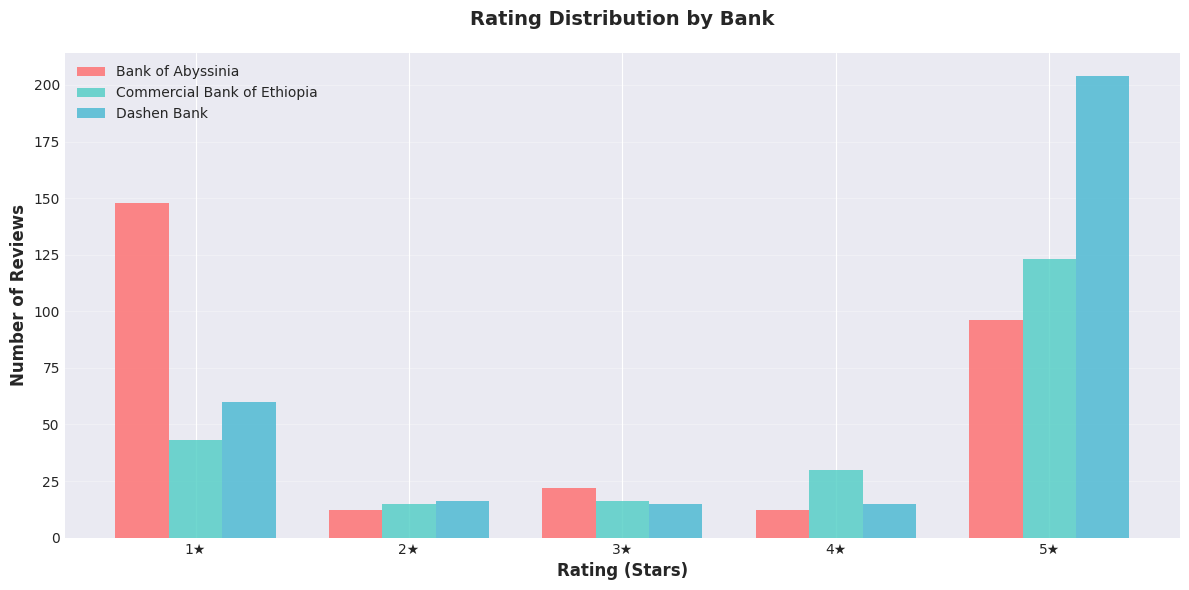

✓ Visualization 1 saved: rating_distribution.png


In [35]:
# Visualization 1: Rating Distribution by Bank
fig, ax = plt.subplots(figsize=(12, 6))

bank_names = sorted(df['bank'].unique())
rating_data = []

for bank in bank_names:
    bank_ratings = df[df['bank'] == bank]['rating'].value_counts().sort_index()
    rating_data.append([bank_ratings.get(i, 0) for i in range(1, 6)])

x = np.arange(1, 6)
width = 0.25

for idx, (bank, data) in enumerate(zip(bank_names, rating_data)):
    ax.bar(x + idx * width, data, width, label=bank, color=colors[idx], alpha=0.8)

ax.set_xlabel('Rating (Stars)', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Reviews', fontsize=12, fontweight='bold')
ax.set_title('Rating Distribution by Bank', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x + width)
ax.set_xticklabels([f'{i}★' for i in range(1, 6)])
ax.legend(loc='upper left')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 1 saved: rating_distribution.png")

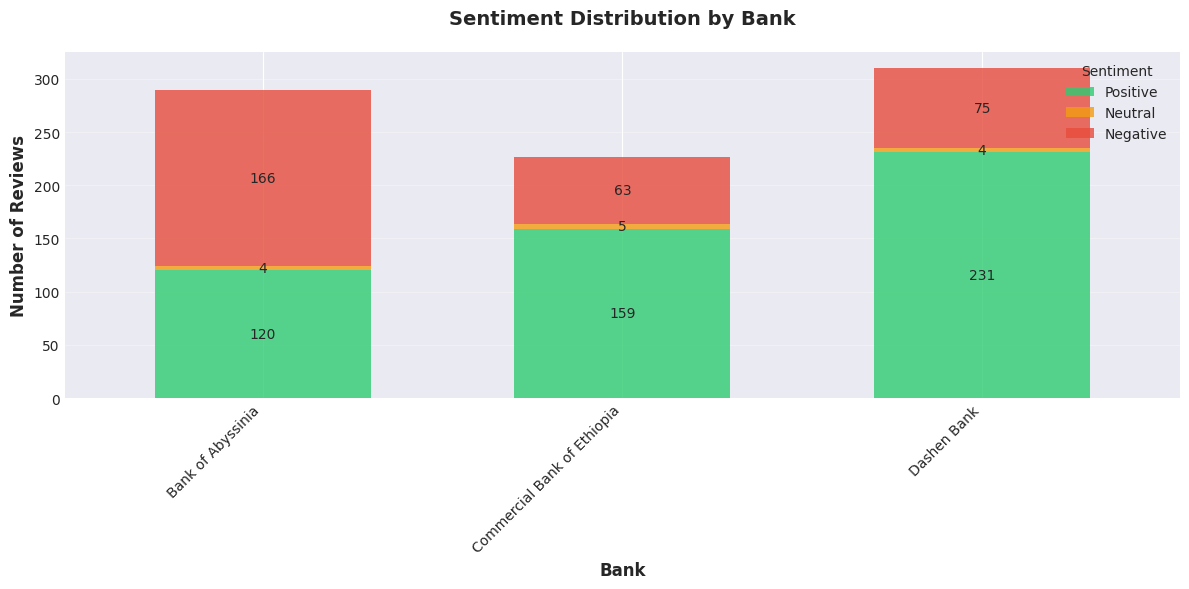

✓ Visualization 2 saved: sentiment_distribution.png


In [36]:
# Visualization 2: Sentiment Distribution by Bank
fig, ax = plt.subplots(figsize=(12, 6))

sentiment_data = df.groupby(['bank', 'sentiment_label']).size().unstack(fill_value=0)
sentiment_data = sentiment_data.reindex(['Positive', 'Neutral', 'Negative'], axis=1)

sentiment_data.plot(kind='bar', stacked=True, ax=ax, 
                    color=['#2ECC71', '#F39C12', '#E74C3C'], 
                    alpha=0.8, width=0.6)

ax.set_xlabel('Bank', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Reviews', fontsize=12, fontweight='bold')
ax.set_title('Sentiment Distribution by Bank', fontsize=14, fontweight='bold', pad=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title='Sentiment', loc='upper right')
ax.grid(axis='y', alpha=0.3)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d')

plt.tight_layout()
plt.savefig('../reports/figures/sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 2 saved: sentiment_distribution.png")

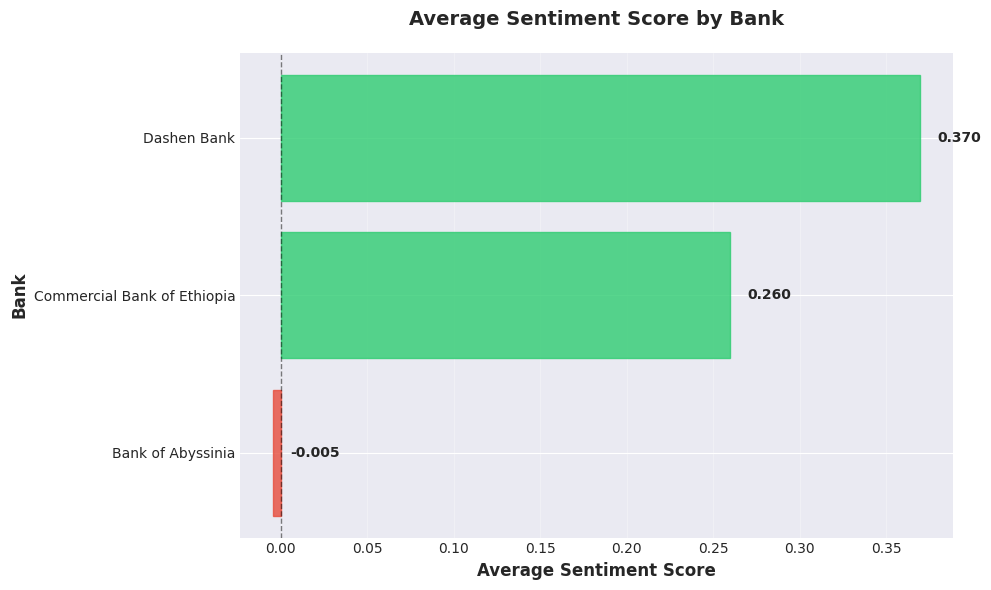

✓ Visualization 3 saved: average_sentiment.png


In [37]:
# Visualization 3: Average Sentiment Score by Bank
fig, ax = plt.subplots(figsize=(10, 6))

bank_sentiment = df.groupby('bank')['sentiment_score'].mean().sort_values(ascending=True)

bars = ax.barh(bank_sentiment.index, bank_sentiment.values, color=colors, alpha=0.8)

# Color bars by sentiment
for bar, value in zip(bars, bank_sentiment.values):
    if value > 0.2:
        bar.set_color('#2ECC71')
    elif value < 0:
        bar.set_color('#E74C3C')
    else:
        bar.set_color('#F39C12')

ax.set_xlabel('Average Sentiment Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Bank', fontsize=12, fontweight='bold')
ax.set_title('Average Sentiment Score by Bank', fontsize=14, fontweight='bold', pad=20)
ax.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for idx, value in enumerate(bank_sentiment.values):
    ax.text(value + 0.01, idx, f'{value:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/average_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 3 saved: average_sentiment.png")

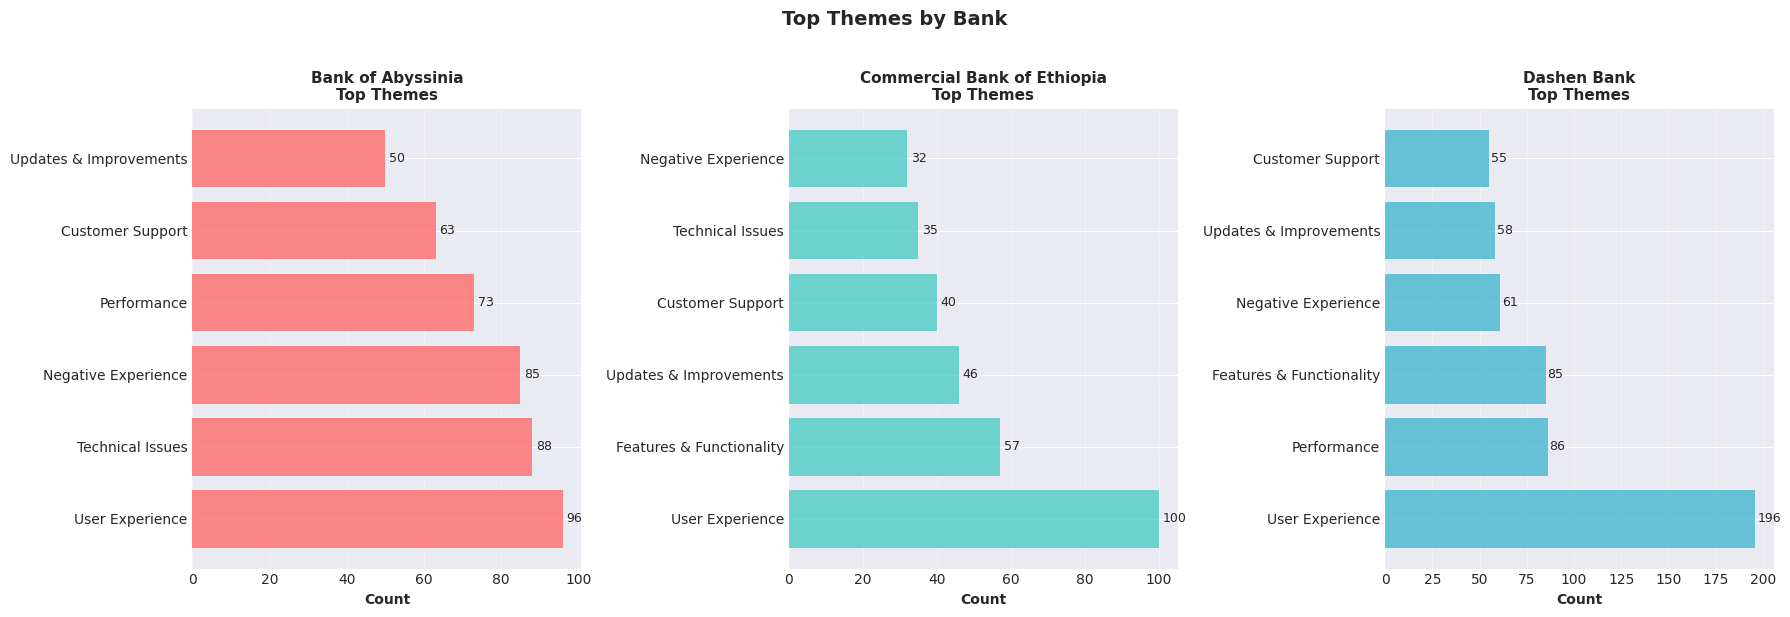

✓ Visualization 4 saved: themes_distribution.png


In [38]:
# Visualization 4: Top Themes Distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, bank in enumerate(sorted(bank_names)):
    ax = axes[idx]
    bank_df = df[df['bank'] == bank]
    
    # Extract all themes
    all_themes = []
    for themes_str in bank_df['themes_str'].dropna():
        if themes_str:
            themes = [t.strip() for t in themes_str.split(',')]
            all_themes.extend(themes)
    
    # Get top 6 themes
    theme_counts = Counter(all_themes)
    top_themes = dict(theme_counts.most_common(6))
    
    # Plot
    y_pos = np.arange(len(top_themes))
    counts = list(top_themes.values())
    labels = [t[:25] for t in top_themes.keys()]  # Truncate long labels
    
    bars = ax.barh(y_pos, counts, color=colors[idx], alpha=0.8)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Count', fontsize=10, fontweight='bold')
    ax.set_title(f'{bank}\nTop Themes', fontsize=11, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(counts):
        ax.text(v + 1, i, str(v), va='center', fontsize=9)

plt.suptitle('Top Themes by Bank', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../reports/figures/themes_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 4 saved: themes_distribution.png")

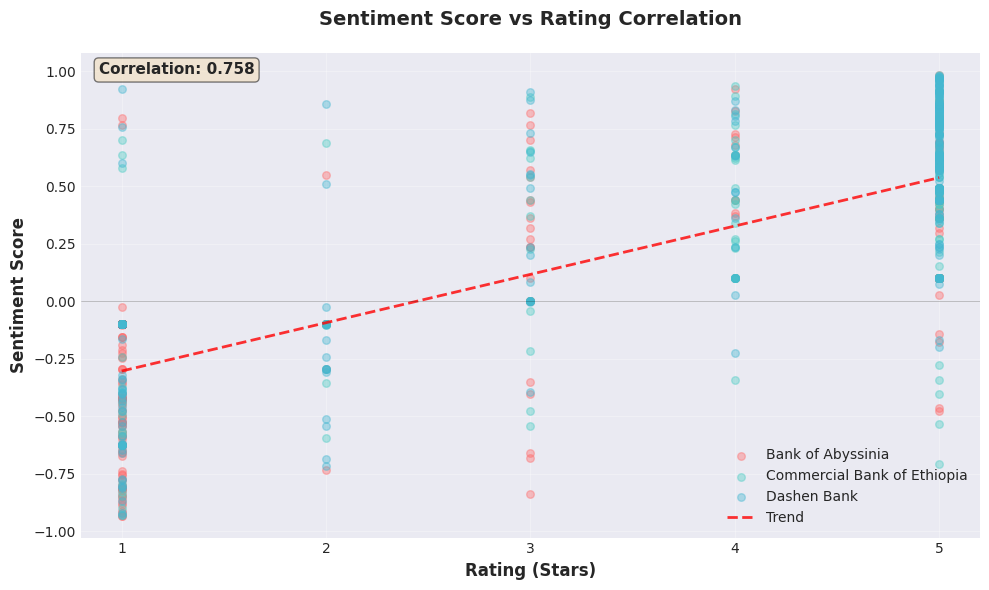

✓ Visualization 5 saved: sentiment_rating_correlation.png


In [39]:
# Visualization 5: Sentiment vs Rating Correlation
fig, ax = plt.subplots(figsize=(10, 6))

# Create scatter plot
for idx, bank in enumerate(sorted(bank_names)):
    bank_data = df[df['bank'] == bank]
    ax.scatter(bank_data['rating'], bank_data['sentiment_score'], 
              alpha=0.4, s=30, c=colors[idx], label=bank)

# Add trend line
z = np.polyfit(df['rating'], df['sentiment_score'], 1)
p = np.poly1d(z)
ax.plot(df['rating'].sort_values(), p(df['rating'].sort_values()), 
        "r--", alpha=0.8, linewidth=2, label='Trend')

ax.set_xlabel('Rating (Stars)', fontsize=12, fontweight='bold')
ax.set_ylabel('Sentiment Score', fontsize=12, fontweight='bold')
ax.set_title('Sentiment Score vs Rating Correlation', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks([1, 2, 3, 4, 5])
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)
ax.grid(alpha=0.3)
ax.legend(loc='lower right')

# Calculate correlation
correlation = df['rating'].corr(df['sentiment_score'])
ax.text(0.02, 0.98, f'Correlation: {correlation:.3f}', 
        transform=ax.transAxes, fontsize=11, fontweight='bold',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../reports/figures/sentiment_rating_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 5 saved: sentiment_rating_correlation.png")

In [40]:
print("\n" + "=" * 70)
print("ALL VISUALIZATIONS COMPLETED")
print("=" * 70)
print("\n5 visualizations saved to: reports/figures/")
print("  1. rating_distribution.png")
print("  2. sentiment_distribution.png")
print("  3. average_sentiment.png")
print("  4. themes_distribution.png")
print("  5. sentiment_rating_correlation.png")


ALL VISUALIZATIONS COMPLETED

5 visualizations saved to: reports/figures/
  1. rating_distribution.png
  2. sentiment_distribution.png
  3. average_sentiment.png
  4. themes_distribution.png
  5. sentiment_rating_correlation.png


## 7. Ethical Considerations and Limitations

### Data Collection Ethics
- **Public Data**: All reviews were collected from publicly available Google Play Store reviews
- **No PII**: No personally identifiable information (names, phone numbers, emails) is included in analysis
- **Aggregated Insights**: Recommendations are based on aggregate patterns, not individual reviews
- **Respectful Use**: Analysis is intended to improve user experience, not to harm banks' reputation

### Potential Biases

**1. Selection Bias**
- Only Google Play Store users (Android) are represented
- iOS users may have different experiences
- Users who don't leave reviews are not captured

**2. Negativity Bias**
- Unhappy users are more likely to leave reviews than satisfied users
- 1-star and 5-star reviews dominate (U-shaped distribution)
- May overestimate problems and underestimate satisfaction

**3. Recency Bias**
- 86% of reviews from 2025, only 14% from 2024
- Recent app updates may have temporary issues not representative of long-term quality
- Older issues may be already resolved

**4. Language Bias**
- Only English reviews analyzed (47% of original dataset filtered out)
- Non-English speakers' opinions not represented
- May miss cultural or regional issues

**5. Self-Selection Bias**
- Reviews are voluntary, not randomly sampled
- Tech-savvy users more likely to leave reviews
- Extreme experiences (very good/bad) overrepresented

### Data Limitations

**1. Sample Size Variability**
- BOA: 290 reviews, CBE: 227 reviews, Dashen: 310 reviews
- Smaller samples for CBE may be less representative

**2. Temporal Coverage**
- Reviews span Aug 2024 - Nov 2025 (16 months)
- May not capture long-term trends or seasonal variations

**3. Sentiment Analysis Accuracy**
- VADER sentiment: 96.8% accuracy for clear cases
- May miss sarcasm, context-dependent meaning, or cultural expressions
- Rating-adjusted approach helps but not perfect

**4. Theme Classification**
- Rule-based classification may miss nuanced themes
- 15.2% of reviews have no themes assigned
- Keywords may appear in different contexts

### Mitigation Strategies

**For Future Analysis:**
1. **Expand Data Sources**: Include iOS App Store reviews, social media feedback
2. **Longer Time Period**: Collect reviews over 2-3 years for trend analysis
3. **Multi-Language Support**: Analyze Amharic, Oromo, and other Ethiopian languages
4. **Regular Updates**: Conduct quarterly analysis to track improvements
5. **User Surveys**: Complement reviews with structured surveys for balanced feedback
6. **A/B Testing**: Validate recommendations with controlled experiments

### Responsible Recommendations

All recommendations provided are:
- Based on evidence from multiple reviews
- Focused on improving user experience
- Respectful of banks' operational constraints
- Intended as suggestions, not mandates
- Subject to feasibility and cost-benefit analysis by each bank